#  Brain Stroke analysis

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import ADASYN

In [52]:
BrainS=pd.read_csv('data/full_data.csv')
BrainS.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


### Data PreProcessing

In [39]:
BrainS.isna().any().sum()

0

In [40]:
for (y,x) in  BrainS.select_dtypes(include=['object']).iteritems():
    print( y,x.unique())

gender ['Male' 'Female']
ever_married ['Yes' 'No']
work_type ['Private' 'Self-employed' 'Govt_job' 'children']
Residence_type ['Urban' 'Rural']
smoking_status ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


---
It appears that the data does not contain any messing values,but the "smoking_status" column contains messing values as  <font color='red'>"Unknown</font> values so we should replace these values with predictives values. we base on two rules 

    * assume that children under the age of ten should never smoke
    * fill in the rest by the majority class

In [41]:
BrainS.loc[BrainS['age']<10]=BrainS.loc[BrainS['age']<10].replace('Unknown','never smoked')
mode=BrainS['smoking_status'].mode()[0]
BrainS=BrainS.replace('Unknown',mode)

In [42]:
sum(BrainS['smoking_status']=='Unknown')

0

### Exploratory data analysis
**In this section we are only interested in the effect of gender, age and smoking rate on brain stroke**

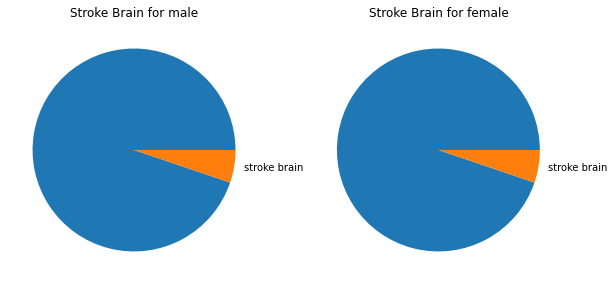

In [43]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches([10,5])
maleStroke=BrainS[BrainS['gender']=='Male'].groupby('stroke').count().iloc[:,2]
ax[0].pie(maleStroke, labels=[' ','stroke brain'])
ax[0].set_title("Stroke Brain for male")
femaleStroke=BrainS[BrainS['gender']=='Female'].groupby('stroke').count().iloc[:,2]
ax[1].pie(maleStroke, labels=['','stroke brain'])
ax[1].set_title("Stroke Brain for female")
plt.show()

---
The two figures show that the proportion of passengers with stroke is almost the same for both sexes, which allows us to conclude that 
strokes do not depend on the sex of the patients.

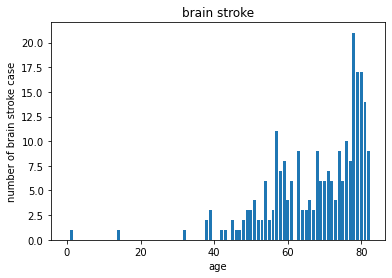

In [44]:
fig, ax=plt.subplots()
Brainage=BrainS.groupby('age').sum()
ax.bar(Brainage.index,Brainage['stroke'])
ax.set_title('brain stroke')
ax.set_xlabel('age')
ax.set_ylabel('number of brain stroke case')
plt.show()

---
We can see that from the age of 40, the number of cases of brain stroke becomes relevant

<BarContainer object of 3 artists>

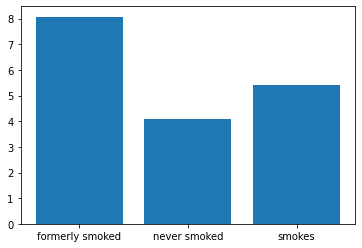

In [45]:
result=100*BrainS.groupby('smoking_status').sum()/BrainS.groupby('smoking_status').count()
plt.bar(result.index,result['stroke'])

<AxesSubplot:xlabel='smoking_status', ylabel='age'>

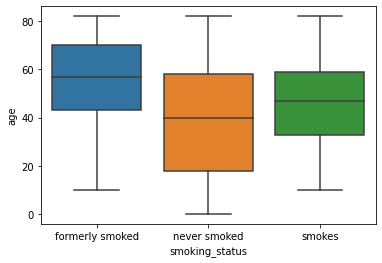

In [46]:
sns.boxplot(x=BrainS['smoking_status'],y=BrainS['age'])

### construction of machine learning model

In [47]:
BrainS=pd.get_dummies(BrainS, prefix=None, prefix_sep='_',)  # creat dumnie variables

<BarContainer object of 2 artists>

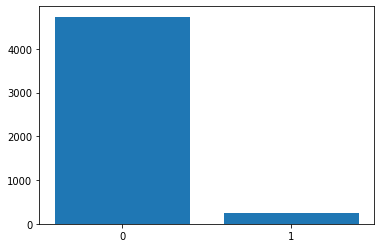

In [48]:
plt.bar(['0','1'],BrainS.groupby('stroke').count().iloc[:,1])

we see here that the data are **umbdalenced** and that before training our model, we must first balance them.

In [49]:
X=BrainS.drop('stroke',axis=1)
Y=BrainS['stroke']

In [50]:
oversample = ADASYN()
x, y = oversample.fit_resample(X, Y)  #over simple data set

Train randomforst model and evalute ate with 5-fold cross validation 

In [73]:
model=RandomForestClassifier() 
accuracy = cross_val_score(model,x,y,cv=5,scoring='accuracy')
print(accuracy)

[0.88269332 0.9905313  0.98684211 0.98526316 0.97210526]
